# Final Project Submission

GROUP 22
- STACY KIRIIRI
- ROSE KYALO
- ANGEL ATUNGIRE
- BRYTONE OMARE

# Insights on Property Investment Profitability

### Overview

In this project, we're diving deep into the King County House Sales dataset to understand what makes properties profitable in King County's real estate market. Our main aim is to provide valuable insights to property investors who want to make smart investment decisions. We'll be looking at various aspects of properties, like their size, number of bedrooms, and condition, to see which factors have the most impact on the sale prices of houses.
By doing this, we hope to help investors optimize their strategies and increase their
chances of getting better returns in the King County real estate market. 

# Business Understanding

### Stakeholder: RASB-berry Property Investors
    
Business Problem: RASB-berry Property investors are looking to optimize their
investment strategies by purchasing properties with the potential for high returns. They
want to know which property attributes, such as square footage, number of bedrooms,
and condition of the property, are most strongly correlated with sale prices.
Objectives
1. Identify Key Predictors of Property Value
- What are the most significant factors that influence property prices in King
County?
- What property attributes have the strongest correlation with sale prices?
- How do location-related variables (e.g., ZIP code, proximity to amenities) impact
property values?

2. Market Trends and Timing
- Can we analyze historical data to identify cyclical patterns in the King County real
estate market?
- When is the best time to buy, hold, or sell properties in different neighborhoods?
- Are there seasonal trends that impact property values, and how can investors
capitalize on them?

## Data understanding and Data preparation

In [61]:
# importing the libraries to be used in the analysis
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [62]:
# here we load the data to see what it contains
data = pd.read_csv('data/kc_house_data.csv')
data.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   
5    101930     1.0         NO  NONE  ...   11 Excellent       3890   
6      6819     2.0         NO  NONE  ...      7 Average       1715   
7      9711     1.0         NO   NaN  ...      7 Average       1060   
8      7470     1.0         NO  NONE  ...      7 Average       1050   
9      6560     2.0         NO  NONE  ...      7 Average       1890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   
6              ?     1995           0.0    98003  47.3097 -122.327   
7            0.0     1963           0.0    98198  47.4095 -122.315   
8          730.0     1960           0.0    98146  47.5123 -122.337   
9            0.0     2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

In [63]:
# viewing the last rows of the dataframe
data.tail(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
21587  7852140040   8/25/2014   507250.0         3       2.50         2270   
21588  9834201367   1/26/2015   429000.0         3       2.00         1490   
21589  3448900210  10/14/2014   610685.0         4       2.50         2520   
21590  7936000429   3/26/2015  1010000.0         4       3.50         3510   
21591  2997800021   2/19/2015   475000.0         3       2.50         1310   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21595   291310100   1/16/2015   400000.0         3       2.50         1600   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
21587      5536     2.0        NaN  NONE  ...     8 Good       2270   
21588      1126     3.0         NO  NONE  ...     8 Good       1490   
21589      6023     2.0         NO   NaN  ...   9 Better       2520   
21590      7200     2.0         NO  NONE  ...   9 Better       2600   
21591      1294     2.0         NO  NONE  ...     8 Good       1180   
21592      1131     3.0         NO  NONE  ...     8 Good       1530   
21593      5813     2.0         NO  NONE  ...     8 Good       2310   
21594      1350     2.0         NO  NONE  ...  7 Average       1020   
21595      2388     2.0        NaN  NONE  ...     8 Good       1600   
21596      1076     2.0         NO  NONE  ...  7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21587            0.0     2003           0.0    98065  47.5389 -121.881   
21588            0.0     2014           0.0    98144  47.5699 -122.288   
21589            0.0     2014           0.0    98056  47.5137 -122.167   
21590          910.0     2009           0.0    98136  47.5537 -122.398   
21591          130.0     2008           0.0    98116  47.5773 -122.409   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21587           2270        5731  
21588           1400        1230  
21589           2520        6023  
21590           2050        6200  
21591           1330        1265  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[10 rows x 21 columns]

In [64]:
#column names
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [65]:
# Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [66]:
# Summary statistic for the dataframe
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [67]:
# Check for missing values
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [68]:
# unique values for the waterfront column
unique_waterfront_values = data['waterfront'].unique()
print(unique_waterfront_values)

[nan 'NO' 'YES']


In [69]:
# unique values for the grade column
unique_grade_values = data['grade'].unique()
print(unique_grade_values)

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


In [70]:
# viewing value counts for the waterfront column
data["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [71]:
#unique values for view column
unique_view_values = data['view'].unique()
print(unique_view_values)

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [72]:
# viewing value counts for the view column
data["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [73]:
#unique values for yr_renovated column
unique_yr_renovated_values = data['yr_renovated'].unique()
print(unique_yr_renovated_values)

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [74]:
# viewing value counts for the view column
data["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [75]:
# calculating the percentage of the missing null values
data['waterfront'].isnull().mean()

0.11001527989998611

In [76]:
# calculating the percentage of the missing null values
data['yr_renovated'].isnull().mean()

0.17789507802009538

In [77]:
# calculating the percentage of the missing null values
data['view'].isnull().mean()

0.0029170718155299346

Through our analysis we decided to drop rows with missing values as the number of missing values was not significant to affect the analysis outcome 

In [78]:
# Drop rows with missing values
data.dropna(inplace=True)

In [79]:
#check if all the rows with missing values were droped 
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [80]:
# Check for duplicate rows in the entire DataFrame
duplicates = data.duplicated().sum ()
duplicates

0

## Data type conversion

In [81]:
# having a general view of the data columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

We decided to convert the below columns to datetime values 

In [82]:
data['yr_built']=pd.to_datetime(data['yr_built'])

In [83]:
data['yr_renovated']=pd.to_datetime(data['yr_renovated'])

In [84]:
data['date']=pd.to_datetime(data['date'])

In [85]:
#cheking if the columns were coverted to datatime
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  datetime64[ns]
 15  yr_renovated   1576

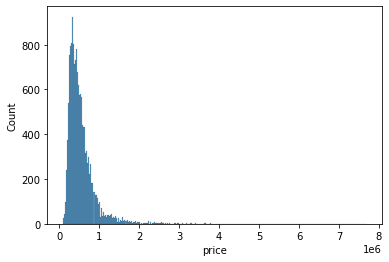

In [86]:
# check for outliers on the price column
sns.histplot(x=data['price'])
plt.show()

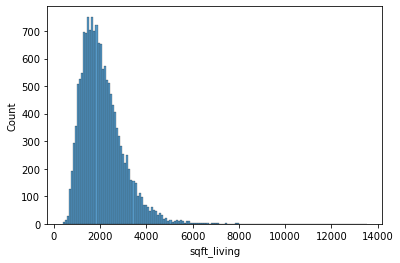

In [87]:
#check for outliers on the sqft_living column
sns.histplot(x=data['sqft_living'])
plt.show()

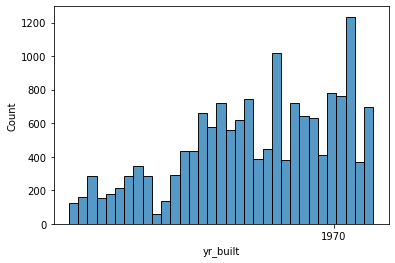

In [88]:
#check for outliers on the yr_built column
sns.histplot(x=data['yr_built'])
plt.show()

### Linear Regression

In [89]:
# look at correlations between the other variables and price
data.corr()["price"]

id              -0.015183
price            1.000000
bedrooms         0.305489
bathrooms        0.526155
sqft_living      0.706189
sqft_lot         0.084504
floors           0.259505
sqft_above       0.612014
zipcode         -0.049502
lat              0.306607
long             0.021215
sqft_living15    0.581572
sqft_lot15       0.079402
Name: price, dtype: float64

From the data in the cell above, we can see that sqft_living is the most positively correlated with price. Others that are positively correlated with prices include sqft_above, sqft_living15, and bathrooms.

## Answering our objectives
What are the most significant factors that influence property prices in King County?


In [90]:
# Select the independent variable and dependent variable
X = data[['sqft_living']]  # Feature (square footage of living area)
y = data['price']           # Target (property price)

In [91]:
# Add a constant (intercept) term to the independent variable
model = sm.OLS(y, sm.add_constant(X))
model

In [92]:
# fit the model
results = model.fit()
results

In [93]:
# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:36:29   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.516e+04   5205.744    -10.597      

####  Linear Regression Results

Looking at the summary above, we can see that the regression line we found was

price = -5.516e+04 + 286.1494sqft_living
 
The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 49.9% of the variance in price

The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05

#### Linear Regression Visualization

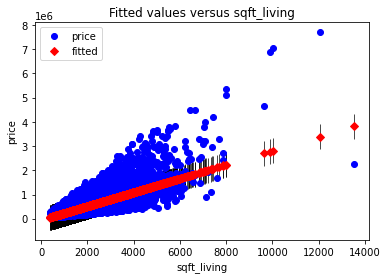

In [94]:
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

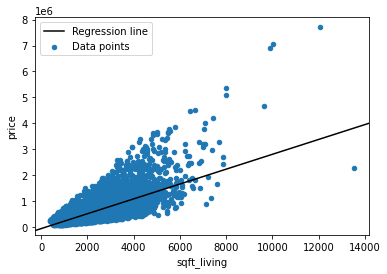

In [95]:
# the regression line
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results = results, label="Regression line", ax=ax, color="black")
ax.legend();

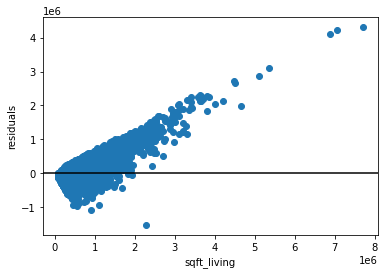

In [96]:
# the residuals
fig, ax = plt.subplots()

ax.scatter(data["price"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### Multiple Linear Regression

In [97]:
# adding another independent variable
X_second = data[["sqft_living", "bathrooms", "bedrooms"]]
X_second

sqft_living  bathrooms  bedrooms
1             2570       2.25         3
3             1960       3.00         4
4             1680       2.00         3
5             5420       4.50         4
6             1715       2.25         3
...            ...        ...       ...
21591         1310       2.50         3
21592         1530       2.50         3
21593         2310       2.50         4
21594         1020       0.75         2
21596         1020       0.75         2

[15762 rows x 3 columns]

In [98]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5545.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:36:31   Log-Likelihood:            -2.1887e+05
No. Observations:               15762   AIC:                         4.377e+05
Df Residuals:                   15758   BIC:                         4.378e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.86e+04   8155.577      8.411      

#### Model with Three Features Results

This time, the model we built was:

price = 6.86e+04 + 316.9197sqft_living + 6491.4498bathrooms -5.968e+04bedrooms
 
The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 51% of the variance in price which is a bit higher than the baseline model

The model coefficients (const, sqft_living, bedrooms) are both statistically significant, with t-statistic p-values well below 0.05 while coefficient (bathrooms) is above the significance value of 0.05

There is a slight increase than we saw with the baseline model, the adjusted r-squared value has increased. This means that bathrooms and bedrooms was meaningfully confounding in the relationship between sqft_living and price

#### Model with Three Features Visualization

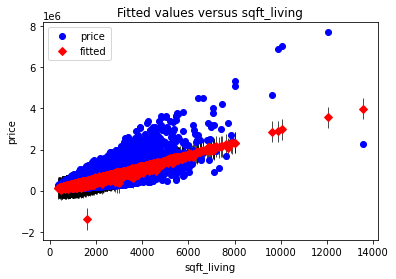

In [99]:
# fitted values vs. sqft_living
sm.graphics.plot_fit(second_results, "sqft_living")
plt.show()

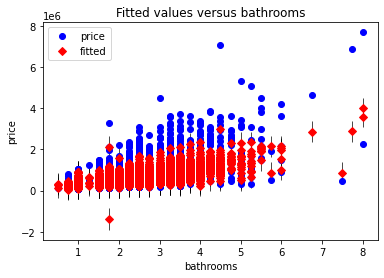

In [100]:
# fitted values vs. bathrooms
sm.graphics.plot_fit(second_results, "bathrooms")
plt.show()

#### Partial Regression Plot
Instead of a basic scatter plot with a best-fit line (since our model is now higher-dimensional), we'll use two partial regression plots, one for each of our predictors.

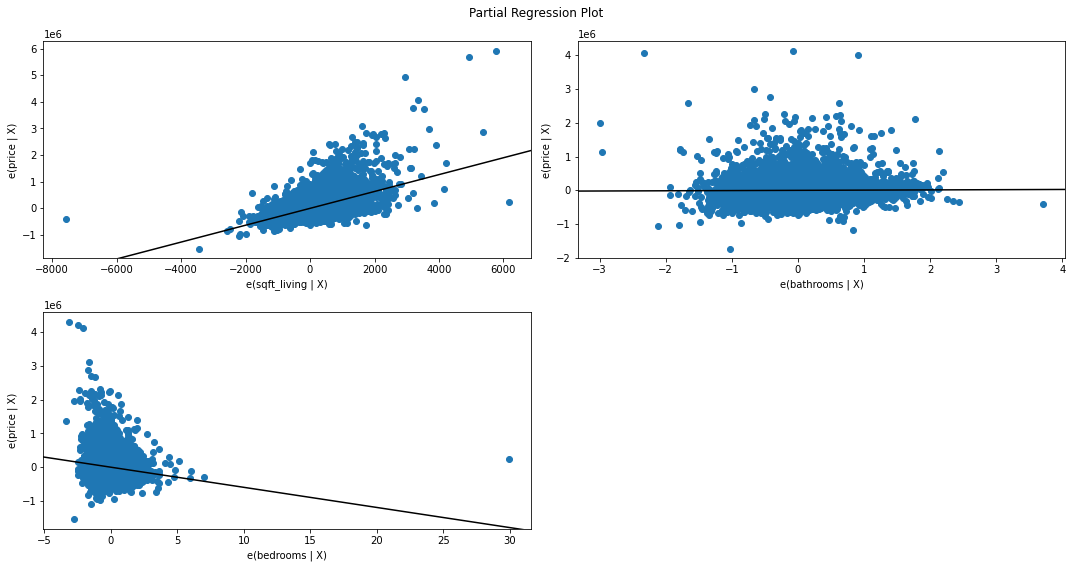

In [101]:
# partial regression plot
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["sqft_living", "bathrooms", "bedrooms"], fig=fig)
plt.tight_layout()
plt.show()

The partial regression plot for bathrooms and bedrooms is similarly showing the marginal contribution of bathrooms and bedrooms compared to a model with just sqft_living.

A reasonable conclusion to reach, looking at these plots, is that bathrooms and bedrooms is useful and should be included in the model.

### How does the condition , view and waterfront access impact property values?
Below we performed one-hot encoding to replace the string objects in some columns with numeric values

In [102]:
# replaces condition objects with numerics based on data dict.
condition_dict = {'Poor':1,'Fair':2,'Average':3,'Good':4,'Very Good':5}
data.condition.replace(to_replace=condition_dict,inplace=True)

# convert waterfront into numeric boolean
waterfront_bool_dict = {'YES':1,'NO':0,np.nan:0}
data.waterfront.replace(to_replace=waterfront_bool_dict,inplace=True)

# convert view from string into categorical ordinal
view_dict = {np.nan:0,'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
data.view.replace(to_replace=view_dict,inplace=True)

# convert grade from string into numerical datatypes
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair':5, '6 Low Average': 6,'7 Average': 7, '8 Good': 8, '9 Better':9, 
              '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}
data.grade.replace(to_replace=grade_dict,inplace=True)                  

In [121]:
# an overview of our categorical columns with numeric values
X_third = data[["condition", "waterfront", "view", "grade"]]
X_third

condition  waterfront  view  grade
1              3           0     0      7
3              5           0     0      7
4              3           0     0      8
5              3           0     0     11
6              3           0     0      7
...          ...         ...   ...    ...
21591          3           0     0      8
21592          3           0     0      8
21593          3           0     0      8
21594          3           0     0      7
21596          3           0     0      7

[15762 rows x 4 columns]

In [122]:
# building a third model
third_model = sm.OLS(y, sm.add_constant(X_third))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4435.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:43:37   Log-Likelihood:            -2.1860e+05
No. Observations:               15762   AIC:                         4.372e+05
Df Residuals:                   15757   BIC:                         4.373e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.232e+06   1.89e+04    -65.036      0.0

This time, the model we built was:

price = -1.232e+06 + 6.638e+04condition + 6.365e+05waterfront + 8.557e+04view + 1.986e+05grade
 
The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 53% of the variance in price which is higher than the baseline model.

The model coefficients (const, condition, waterfront, view and grade) are both statistically significant, with t-statistic p-values well below 0.05.

### Multiple Linear Regression with all the all the numerical columns being added as features


In [105]:
X_all = data.drop("price", axis=1).select_dtypes("number")
X_all

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1      6414100192         3       2.25         2570      7242     2.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
5      7237550310         4       4.50         5420    101930     1.0   
6      1321400060         3       2.25         1715      6819     2.0   
...           ...       ...        ...          ...       ...     ...   
21591  2997800021         3       2.50         1310      1294     2.0   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  zipcode      lat  \
1               0     0          3      7        2170    98125  47.7210   
3               0     0          5      7        1050    98136  47.5208   
4               0     0          3      8        1680    98074  47.6168   
5               0     0          3     11        3890    98053  47.6561   
6               0     0          3      7        1715    98003  47.3097   
...           ...   ...        ...    ...         ...      ...      ...   
21591           0     0          3      8        1180    98116  47.5773   
21592           0     0          3      8        1530    98103  47.6993   
21593           0     0          3      8        2310    98146  47.5107   
21594           0     0          3      7        1020    98144  47.5944   
21596           0     0          3      7        1020    98144  47.5941   

          long  sqft_living15  sqft_lot15  
1     -122.319           1690        7639  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
5     -122.005           4760      101930  
6     -122.327           2238        6819  
...        ...            ...         ...  
21591 -122.409           1330        1265  
21592 -122.346           1530        1509  
21593 -122.362           1830        7200  
21594 -122.299           1020        2007  
21596 -122.299           1020        1357  

[15762 rows x 16 columns]

In [106]:
# building a fourth model
fourth_model = sm.OLS(y, sm.add_constant(X_all))
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2078.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:36:35   Log-Likelihood:            -2.1560e+05
No. Observations:               15762   AIC:                         4.312e+05
Df Residuals:                   15745   BIC:                         4.314e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.508e+07   3.37e+06    -10.400

Based on the Model above, the analysis below explains the coefficients of the different added features.

1. **Bedrooms (Coefficient: -33,450)**:
   - Hypothetical Example: Suppose all other factors remain constant, and a property has 3 bedrooms. Increasing the number of bedrooms to 4 would result in an approximate price decrease of 33,450 dollars.
   - Percentage Impact: This represents a decrease of approximately 10% in price, given an initial price of 334,500 dollars.
   

2. **Square Footage of Living Space (Coefficient: +175.99)**:
   - Hypothetical Example: If a property has 2,000 square feet of living space, increasing it to 2,100 square feet would lead to an approximate price increase of 175.99 dollars.
   - Percentage Impact: This represents an increase of approximately 0.09% in price, given an initial price of 334,500 dollars.
   

3. **Number of Floors (Coefficient: -25,660)**:
   - Hypothetical Example: Suppose a property has 2 floors, and you increase it to 3 floors while keeping other factors constant. The price would decrease by approximately 25,660 dollars.
   - Percentage Impact: This represents a decrease of approximately 7.68% in price, given an initial price of 334,500 dollars.
   

4. **Waterfront (Coefficient: +613,600)**:
   - Hypothetical Example: If a property is not on a waterfront, and you upgrade to a waterfront property while keeping other factors constant, the price would increase by approximately 613,600 dollars.
   - Percentage Impact: This represents an increase of approximately 183.28% in price, given an initial price of 334,500 dollars.
   

5. **View (Coefficient: +61,440)**:
   - Hypothetical Example: Suppose a property has no special view, and you improve it to have an excellent view while keeping other factors constant. The price would increase by approximately 61,440 dollars.
   - Percentage Impact: This represents an increase of approximately 18.37% in price, given an initial price of 334,500 dollars.
   

6. **Condition (Coefficient: +52,070)**:
   - Hypothetical Example: If a property's condition is fair, and you renovate it to an excellent condition while keeping other factors constant, the price would increase by approximately 52,070 dollars.
   - Percentage Impact: This represents an increase of approximately 15.58% in price, given an initial price of 334,500 dollars.
   

7. **Grade (Coefficient: +74,770)**:
   - Hypothetical Example: Suppose a property has a grade of 6, and you improve it to a grade of 7 while keeping other factors constant. The price would increase by approximately 74,770 dollars.
   - Percentage Impact: This represents an increase of approximately 22.39% in price, given an initial price of 334,500 dollars.
   

8. **Square Footage Above Ground (Coefficient: +40.23)**:
   - Hypothetical Example: If a property has 1,000 square feet above ground, increasing it to 1,100 square feet while keeping other factors constant would lead to an approximate price increase of 40.23 dollars.
   - Percentage Impact: This represents an increase of approximately 0.12% in price, given an initial price of 334,500 dollars.
   
   

9. **Latitude (Coefficient: +679,500)**:
    - Hypothetical Example: Suppose a property is located at a certain latitude, and you move it slightly northward while keeping other factors constant. The price would increase by approximately 679,500 dollars.
    - Percentage Impact: This represents an increase of approximately 203.25% in price, given an initial price of 334,500 dollars.
    


### When is the best time to buy, or sell a house 

In [107]:
# Create a new column with only the months
data['month'] = data['date'].dt.strftime('%B')

In [108]:
#Initialize an empty dictionary to store the counts
month_count_dict = {}

# Iterate through the month column and count occurences
for i in data['month']:
    if i in month_count_dict:
        month_count_dict[i] += 1
    else:
        month_count_dict[i] = 1

In [109]:
# This dictionary shows how many houses were sold in each month over the years
month_count_dict

{'December': 1063,
 'February': 887,
 'May': 1782,
 'June': 1570,
 'April': 1632,
 'March': 1348,
 'October': 1344,
 'January': 731,
 'July': 1637,
 'August': 1424,
 'November': 1051,
 'September': 1293}

In [110]:
# create a list of months in chronological order
chron_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
# create a new dictionary with months in chronological order
month_dict = {month: month_count_dict[month] for month in chron_months}

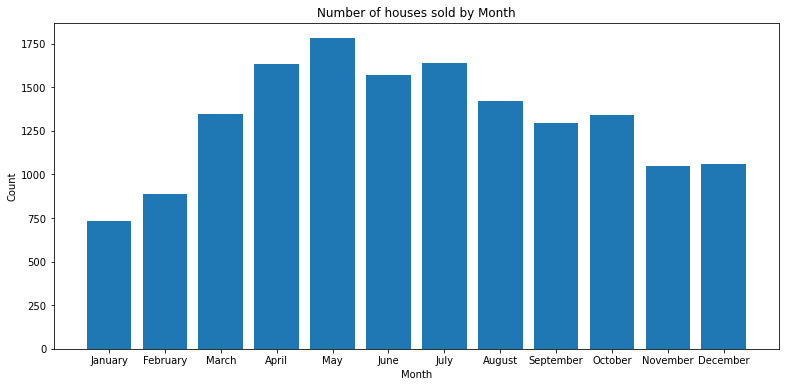

In [123]:
# Extract the months (keys) and their corresponding counts (values) from the dictionary
months = list(month_dict.keys())
counts = list(month_dict.values())

# Create a bar graph
plt.figure(figsize=(13, 6))
plt.bar(months, counts, tick_label=months)

# Customize the plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of houses sold by Month')

# Show the plot
plt.show()

This bar graph shows that most of the houses were sold in the middle of the year over the years with May having the highest number of houses sold. The best time to buy, sell or hold properties is in the middle of the year, months from April to July

### Folium Map
How do location-related variables (e.g., ZIP code, proximity to amenities) impact property values?

In [124]:
import folium
from folium.plugins import MarkerCluster

# Create a Folium map
m = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=10)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for index, row in data.iterrows():
    popup_text = f"Location: {row['zipcode']}<br>Price: ${row['price']: .2f}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(marker_cluster)

# Display the map
m.save('map.html')

In [113]:
# Sort the DataFrame by the 'Price' column in ascending order for least expensive houses
data_least_expensive = data.sort_values(by='price').head(30)

# Sort the DataFrame by the 'Price' column in descending order for most expensive houses
data_most_expensive = data.sort_values(by='price', ascending=False).head(30)

# Create a Folium map
m = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=10)

# Create separate MarkerCluster layers for most and least expensive houses
cluster_least_expensive = MarkerCluster().add_to(m)
cluster_most_expensive = MarkerCluster().add_to(m)

# Add markers for the least expensive houses
for index, row in data_least_expensive.iterrows():
    popup_text = f"Location: {row['zipcode']}<br>price: ${row['price']:.2f}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(cluster_least_expensive)

# Add markers for the most expensive houses
for index, row in data_most_expensive.iterrows():
    popup_text = f"Location: {row['zipcode']}<br>price: ${row['price']:.2f}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(cluster_most_expensive)

# Display the map
m.save('map_with_clustered_prices.html')

We created  folium map to try and find out if the location of the house affects it's value, and from the [folium map](map_with_clustered_prices.html), we can see that the most expensive houses are located near lake washington and the least expensive houses are loacted further away from the lake.

#### Can we analyze historical data to identify cyclical patterns in the King County real estate market?

In [114]:
# Converting datatype
data["yr_built"] = data["yr_built"].astype("int64")
data["yr_built"]

1        1951
3        1965
4        1987
5        2001
6        1995
         ... 
21591    2008
21592    2009
21593    2014
21594    2009
21596    2008
Name: yr_built, Length: 15762, dtype: int64

In [115]:
# Creating a new column with the year only 
data['year'] = data['date'].dt.year
data['year']

1        2014
3        2014
4        2015
5        2014
6        2014
         ... 
21591    2015
21592    2014
21593    2015
21594    2014
21596    2014
Name: year, Length: 15762, dtype: int64

In [116]:
# Calculating the age of houses
house_age = data[['year', 'yr_built', 'price']]
house_age

year  yr_built      price
1      2014      1951   538000.0
3      2014      1965   604000.0
4      2015      1987   510000.0
5      2014      2001  1230000.0
6      2014      1995   257500.0
...     ...       ...        ...
21591  2015      2008   475000.0
21592  2014      2009   360000.0
21593  2015      2014   400000.0
21594  2014      2009   402101.0
21596  2014      2008   325000.0

[15762 rows x 3 columns]

In [117]:
# viewing data
data["age"] = data["year"] - data["yr_built"]
data.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192 2014-12-09   538000.0         3       2.25         2570   
3  2487200875 2014-12-09   604000.0         4       3.00         1960   
4  1954400510 2015-02-18   510000.0         3       2.00         1680   
5  7237550310 2014-05-12  1230000.0         4       4.50         5420   
6  1321400060 2014-06-27   257500.0         3       2.25         1715   

   sqft_lot  floors  waterfront  view  ...  yr_built  \
1      7242     2.0           0     0  ...      1951   
3      5000     1.0           0     0  ...      1965   
4      8080     1.0           0     0  ...      1987   
5    101930     1.0           0     0  ...      2001   
6      6819     2.0           0     0  ...      1995   

                   yr_renovated  zipcode      lat     long sqft_living15  \
1 1970-01-01 00:00:00.000001991    98125  47.7210 -122.319          1690   
3 1970-01-01 00:00:00.000000000    98136  47.5208 -122.393          1360   
4 1970-01-01 00:00:00.000000000    98074  47.6168 -122.045          1800   
5 1970-01-01 00:00:00.000000000    98053  47.6561 -122.005          4760   
6 1970-01-01 00:00:00.000000000    98003  47.3097 -122.327          2238   

   sqft_lot15     month  year  age  
1        7639  December  2014   63  
3        5000  December  2014   49  
4        7503  February  2015   28  
5      101930       May  2014   13  
6        6819      June  2014   19  

[5 rows x 24 columns]

In [118]:
# Building another model
X_age = data[["age"]]
y_age = data["price"]

In [119]:
age_model = sm.OLS(y_age, sm.add_constant(X_age))
age_results = age_model.fit()

print(age_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     38.37
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           6.01e-10
Time:                        15:37:12   Log-Likelihood:            -2.2453e+05
No. Observations:               15762   AIC:                         4.491e+05
Df Residuals:                   15760   BIC:                         4.491e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.683e+05   5271.912    107.804      0.0

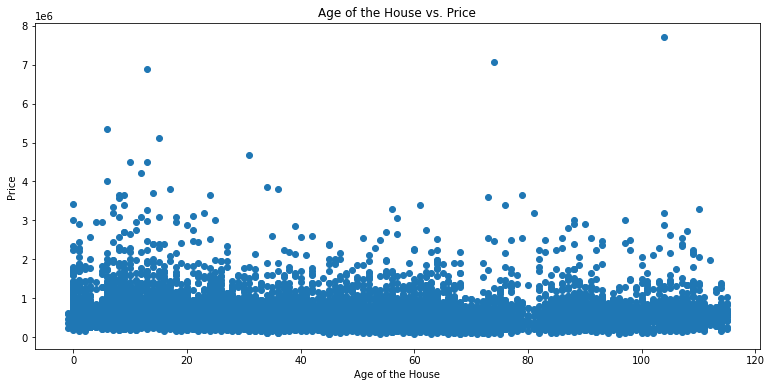

In [120]:
# Create a scatter plot
plt.figure(figsize=(13, 6))
plt.scatter(data["age"], data["price"])

# Customize the plot labels and title
plt.xlabel('Age of the House')
plt.ylabel('Price')
plt.title('Age of the House vs. Price')

plt.show()

From the analysis and vizualization above, we can conclude that age of the house does not affect the price of the house given the r-squared value which is 0.02 and the scatter plot showing now correlation between the two.

## Conclusion

Based on the Ordinary Least Squares (OLS) Regression Results for the model with all the numeric columns, we can derive several insights that are relevant to RASB-berry Property Investors. Here's a breakdown of the key findings and a recommendation:

### Key Findings:

1. *R-squared and Adjusted R-squared*: The R-squared value of 0.679 indicates that the model explains approximately 67.9% of the variance in the target variable (price). This suggests that the model has some predictive power. The adjusted R-squared value, which accounts for the number of predictors, is also 0.678, indicating that most of the included variables contribute meaningfully to the model.

2. *Significant Predictors*: Several predictors have statistically significant coefficients, as indicated by low p-values (P>|t|). These predictors include:
   - `bedrooms`: Number of bedrooms
   - `sqft_living`: Square footage of living space in the home
   - `floors`: Number of floors in the house
   - `waterfront`: Whether the house is on a waterfront
   - `view`: Quality of view from the house
   - `condition`: Overall condition of the house
   - `grade`: Overall grade of the house
   - `sqft_above`: Square footage of the house apart from the basement
   - `zipcode`: ZIP Code
   - `lat`: Latitude coordinate
   - `long`: Longitude coordinate
   - `sqft_living15`: Square footage of interior housing living space for the nearest 15 neighbors
   - `sqft_lot15`: Square footage of the land lots of the nearest 15 neighbors

3. *Coefficients*: The coefficients represent the estimated impact of each predictor on the target variable (price). For example, an increase in the number of bedrooms (`bedrooms`) is associated with a decrease in the property price, while an increase in square footage of living space (`sqft_living`) is associated with an increase in price.

4. *F-statistic*: The F-statistic (2078.0) is significant, indicating that the overall model is statistically significant and that at least one of the predictors has a non-zero coefficient.

### Recommendation:

Based on these findings, here are some recommendations for RASB-berry Property Investors:

1. *Consider Property Attributes*: Pay close attention to property attributes that have a significant impact on price. These include square footage of living space (`sqft_living`), the quality of the view (`view`), overall grade (`grade`), and whether the property is on a waterfront (`waterfront`). These factors are crucial in determining property values in the King County area. For example, most of the properties with higher interest rates were located near Lake Washington, thus explaining the waterfront and the view.


2. *Location Matters*: The `zipcode`, `lat`, and `long` variables have significant coefficients, indicating that the location of a property plays a substantial role in its price. Invest in neighborhoods that exhibit positive coefficients in these variables, as they are likely to offer better returns as we can see in [this folium map](map.html), most of the houses are located North and near the Lake Washington.


3. *Seasonal Trends*: Analyzing seasonal trends in property prices using months yielded results that indicate the most houses are sold in the Spring time and Summer time and thus the Property Investors should maximize the months in this season especially May. 


4. *Renovation Strategies*: Investigate how specific renovations or improvements impact property values. While the dataset may not directly include renovation data, you can explore correlations between renovation indicators and price to provide more detailed advice to homeowners.


5. *Continuous Monitoring*: Keep a close watch on the King County real estate market in regards to the recommendations above. Market conditions can change over time, and it's essential to continuously monitor trends and adjust your investment strategies accordingly.

Remember that these recommendations are based on the current dataset and regression analysis. Real estate investment decisions should also consider other factors such as market dynamics, economic conditions, and long-term investment goals.